In [70]:
import pandas as pd
import numpy as np
import ast

In [132]:
file_name = "python_vacancies-2022-10-31-14:16.csv"
df = pd.read_csv(file_name)
df_columns = ["title", "technologies", "experience"]
df = df.loc[:, df_columns].copy()
df = df.dropna()
technologies_list = [ast.literal_eval(technologies) for technologies in df["technologies"]]
df["technologies"] = technologies_list
df

,title,technologies,experience
0,Backend Developer (Poland)\n \n\n ...,"[Backend development, back-end, backend, middl...",3
1,Senior Python Backend Engineer,"[Python, SW design, Kubernetes, Docker, Micros...",5
3,Middle Full-Stack Developer (for Ukrainian Cat...,"[Python, Django, edX, JavaScript]",1
4,Senior AI Engineer\n \n\n \n...,[AI],5
5,Full Stack Developer,"[Python, JavaScript, NodeJS, React, React.js]",5
...,...,...,...
471,Tableau Developer (banking)\n \n\n ...,"[Tableau, Python]",3
473,Python Engineer,"[Python, Django]",3
474,Middle/Senior Python Developer,"[Python, AWS, Postgre SQL, Django]",3
475,Python developer with data science skills\n ...,"[Data Science, Python, numpy, Pandas, Git, Git...",3


In [133]:
df_technologies_columns = [technology for technologies in df["technologies"] for technology in technologies]
df_technologies_columns = list(dict.fromkeys(df_technologies_columns))

technologies_flat = df["technologies"].explode()
technologies_flat


0      Backend development
0                 back-end
0                  backend
0         middle developer
0                   Python
              ...         
475                 GitHub
475         GitHub actions
476                 Python
476             JavaScript
476                  React
Name: technologies, Length: 1413, dtype: object

In [134]:
df = df.join(pd.crosstab(technologies_flat.index, technologies_flat))
df = df.drop(columns=["experience", "title", "technologies"])
df

,(PostgreSQL,-\tC#,ABAP,AI,AIO Http,API,API Integration,API REST,API Tests,AWS,...,scraping,senior,smart contracts,sql,tableau,technical support,tokens,web scraping,xiL,фулстек
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

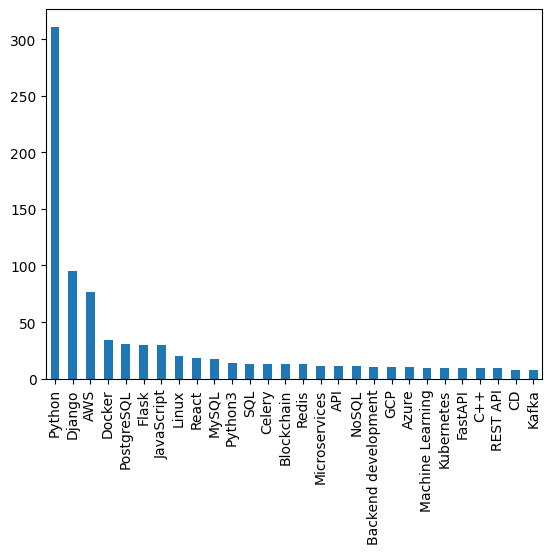

In [143]:
top_technologies = df.sum().sort_values(ascending=False).iloc[:28]
top_technologies.plot.bar(